## Settings

In [1]:
# 一つ上の階層からモジュールを参照できるようにする
import sys
sys.path.append('..')

In [2]:
# ロギング用
import os
from datetime import datetime, timezone, timedelta
from logs.logger import create_logger
# モデル作成補助用
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from features.funcs import load_feather
from evals.funcs import get_pred_result, get_acc_and_logloss, print_conf_matrix
from inputs.funcs import load_data
# モデル作成用
import xgboost as xgb
from models.xgb import ModelXGB, ModelXGBSklearn
from keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [3]:
# モジュールの変更を自動的に反映する
%load_ext autoreload
%autoreload 2

In [4]:
# loggingの設定を行う
today = datetime.now(timezone(timedelta(hours=9)))
exp_version = today.strftime('%Y%m%d')
os.environ['exp_version'] = exp_version
create_logger(exp_version)

## ModelXGB

### Base

In [24]:
train_x, train_y, test_x = load_data()

In [25]:
train_x = train_x.drop(['Name', 'Cabin', 'Ticket'], axis=1)
test_x = test_x.drop(['Name', 'Cabin', 'Ticket'], axis=1)

In [26]:
base_path = '../features/xgb/'
cols_to_rplc_train = {'Sex': base_path + 'sex_train.feather',
                      'Embarked': base_path + 'embarked_train.feather'}
train_x = load_feather(train_x, cols_to_rplc_train)

In [27]:
model = ModelXGB(model_name='base_model', logging=True, verbose_eval=False)
pred_train = get_pred_result(model, train_x, train_y)

[INFO] 2021-02-11 20:18:04,416 >>	=== XGB MODEL ===
[INFO] 2021-02-11 20:18:04,417 >>	PARAMS: {'model_name': 'base_model', 'num_round': 10}


In [28]:
get_acc_and_logloss(pred_train, train_y, logging=True)

[INFO] 2021-02-11 20:18:05,631 >>	ACCURACY: 0.6924803591470258
[INFO] 2021-02-11 20:18:05,632 >>	LOGLOSS: 0.591436999874016
[INFO] 2021-02-11 20:18:05,632 >>	data size: 891
[INFO] 2021-02-11 20:18:05,633 >>	correct predictions: 617
[INFO] 2021-02-11 20:18:05,633 >>	


### Without Embarked

In [67]:
train_x, train_y, test_x = load_data()

In [68]:
train_x = train_x.drop(['Name', 'Cabin', 'Ticket', 'Embarked'], axis=1)

In [69]:
base_path = '../features/xgb/'
cols_to_rplc_train = {'Sex': base_path + 'sex_train.feather'}
train_x = load_feather(train_x, cols_to_rplc_train)
train_x = train_x.drop('PassengerId', axis=1)

In [70]:
model = ModelXGB(model_name='without_emberked_col', logging=True, verbose_eval=False)
pred_train = get_pred_result(model, train_x, train_y)

[INFO] 2021-02-11 20:28:17,359 >>	=== XGB MODEL ===
[INFO] 2021-02-11 20:28:17,360 >>	PARAMS: {'model_name': 'without_emberked_col', 'num_round': 10}


In [71]:
get_acc_and_logloss(pred_train, train_y, logging=True)

[INFO] 2021-02-11 20:28:18,168 >>	ACCURACY: 0.8237934904601572
[INFO] 2021-02-11 20:28:18,169 >>	LOGLOSS: 0.4283875759343975
[INFO] 2021-02-11 20:28:18,170 >>	data size: 891
[INFO] 2021-02-11 20:28:18,170 >>	correct predictions: 734
[INFO] 2021-02-11 20:28:18,171 >>	


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

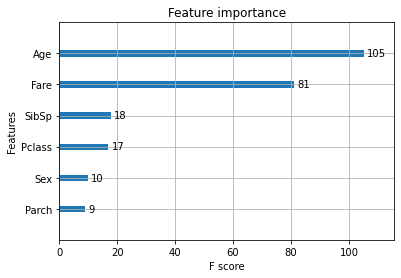

In [72]:
xgb.plot_importance(model.get_model())

### Without Embarked with different params

In [75]:
model = ModelXGB(num_round=15, model_name='without_embarked_and_more_num_rounds', logging=True, verbose_eval=False)
pred_train = get_pred_result(model, train_x, train_y)

[INFO] 2021-02-11 20:28:39,383 >>	=== XGB MODEL ===
[INFO] 2021-02-11 20:28:39,385 >>	PARAMS: {'model_name': 'with_age_group_col_and_more_num_rounds', 'num_round': 15}


In [76]:
get_acc_and_logloss(pred_train, train_y, logging=True)

[INFO] 2021-02-11 20:28:42,794 >>	ACCURACY: 0.8215488215488216
[INFO] 2021-02-11 20:28:42,795 >>	LOGLOSS: 0.43085336870399926
[INFO] 2021-02-11 20:28:42,795 >>	data size: 891
[INFO] 2021-02-11 20:28:42,796 >>	correct predictions: 732
[INFO] 2021-02-11 20:28:42,797 >>	


### With AgeGroup

In [61]:
train_x, train_y, test_x = load_data()

In [62]:
train_x = train_x.drop(['Name', 'Cabin', 'Ticket', 'Embarked'], axis=1)

In [63]:
base_path = '../features/xgb/'
cols_to_rplc_train = {'Sex': base_path + 'sex_train.feather',
                      'AgeGroup': base_path + 'age_train.feather'}
train_x = load_feather(train_x, cols_to_rplc_train)
train_x = train_x.drop(['PassengerId', 'Age'], axis=1)

In [64]:
model = ModelXGB(model_name='with_age_group_col', logging=True, verbose_eval=False)
pred_train = get_pred_result(model, train_x, train_y)

[INFO] 2021-02-11 20:26:32,954 >>	=== XGB MODEL ===
[INFO] 2021-02-11 20:26:32,955 >>	PARAMS: {'model_name': 'with_age_group_col', 'num_round': 10}


In [65]:
get_acc_and_logloss(pred_train, train_y, logging=True)

[INFO] 2021-02-11 20:26:34,825 >>	ACCURACY: 0.7227833894500562
[INFO] 2021-02-11 20:26:34,826 >>	LOGLOSS: 0.5756773495990218
[INFO] 2021-02-11 20:26:34,827 >>	data size: 891
[INFO] 2021-02-11 20:26:34,827 >>	correct predictions: 644
[INFO] 2021-02-11 20:26:34,828 >>	


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

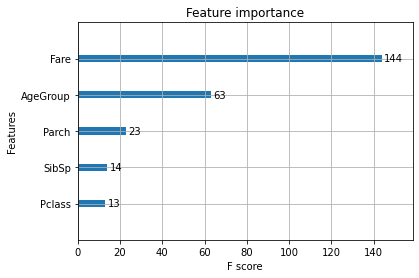

In [66]:
xgb.plot_importance(model.get_model())

## ModelXGBSklearn

In [78]:
train_x, train_y, test_x = load_data()

In [79]:
train_x = train_x.drop(['Name', 'Cabin', 'Ticket', 'Embarked'], axis=1)

In [80]:
base_path = '../features/xgb/'
cols_to_rplc_train = {'Sex': base_path + 'sex_train.feather'}
train_x = load_feather(train_x, cols_to_rplc_train)
train_x = train_x.drop('PassengerId', axis=1)

### Base

In [81]:
model = ModelXGBSklearn(n_estimators=15, learning_rate=0.2, model_name='sklearn', logging=True, verbose=False)
pred_train = get_pred_result(model, train_x, train_y)
get_acc_and_logloss(pred_train, train_y, logging=True)

[INFO] 2021-02-11 20:31:42,235 >>	=== XGB SKLEARN MODEL ===
[INFO] 2021-02-11 20:31:42,237 >>	PARAMS: {'model_name': 'sklearn', 'n_estimator': 15, 'learning_rate': 0.2, 'max_depth': None}
[INFO] 2021-02-11 20:31:42,331 >>	ACCURACY: 0.8215488215488216
[INFO] 2021-02-11 20:31:42,332 >>	LOGLOSS: 2.8762932454861607
[INFO] 2021-02-11 20:31:42,332 >>	data size: 891
[INFO] 2021-02-11 20:31:42,333 >>	correct predictions: 732
[INFO] 2021-02-11 20:31:42,334 >>	


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

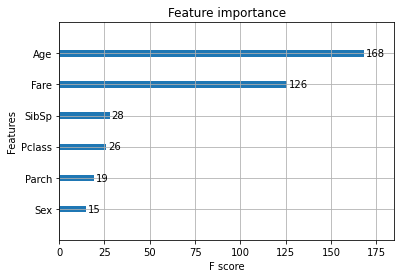

In [82]:
xgb.plot_importance(model.get_model())

### With different params

In [84]:
model = ModelXGBSklearn(n_estimators=100, learning_rate=0.03, model_name='slearn', logging=True, verbose=False)
pred_train = get_pred_result(model, train_x, train_y)
get_acc_and_logloss(pred_train, train_y, logging=True)

[INFO] 2021-02-11 20:32:22,330 >>	=== XGB SKLEARN MODEL ===
[INFO] 2021-02-11 20:32:22,331 >>	PARAMS: {'model_name': 'slearn', 'n_estimator': 100, 'learning_rate': 0.03, 'max_depth': None}
[INFO] 2021-02-11 20:32:22,713 >>	ACCURACY: 0.8204264870931538
[INFO] 2021-02-11 20:32:22,713 >>	LOGLOSS: 2.894383139483928
[INFO] 2021-02-11 20:32:22,714 >>	data size: 891
[INFO] 2021-02-11 20:32:22,715 >>	correct predictions: 731
[INFO] 2021-02-11 20:32:22,716 >>	


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

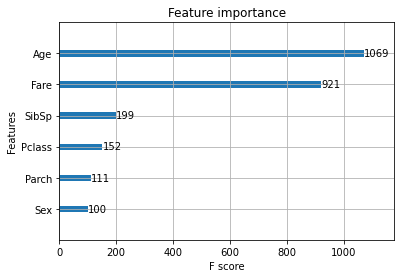

In [85]:
xgb.plot_importance(model.get_model())

### With different params

In [86]:
model = ModelXGBSklearn(n_estimators=20, learning_rate=0.2, max_depth=None, model_name='sklearn_without_passenger_id', verbose=False, logging=True)
pred_train = get_pred_result(model, train_x, train_y)
get_acc_and_logloss(pred_train, train_y, logging=True)

[INFO] 2021-02-11 20:33:35,516 >>	=== XGB SKLEARN MODEL ===
[INFO] 2021-02-11 20:33:35,517 >>	PARAMS: {'model_name': 'sklearn_without_passenger_id', 'n_estimator': 20, 'learning_rate': 0.2, 'max_depth': None}
[INFO] 2021-02-11 20:33:35,615 >>	ACCURACY: 0.8215488215488216
[INFO] 2021-02-11 20:33:35,616 >>	LOGLOSS: 2.876293245487933
[INFO] 2021-02-11 20:33:35,616 >>	data size: 891
[INFO] 2021-02-11 20:33:35,617 >>	correct predictions: 732
[INFO] 2021-02-11 20:33:35,618 >>	


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

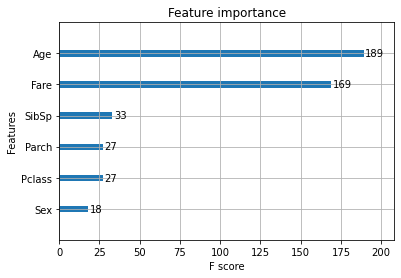

In [87]:
xgb.plot_importance(model.get_model())

It seems that Age is the most deciding factor in this model. This is understandable if we recall the scene of the famous Titanic movie.

### GridSearchCV

#### Base

In [92]:
params = {
    'objective':['binary:logistic'],
    'learning_rate': [0.025, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [5, 10, 15, 20, 40, 60, 100],
    'silent': [1],
    'n_estimators': [5, 10, 15, 20, 40, 60, 100, 1000],
    'seed': [1]
}

In [93]:
model = xgb.XGBClassifier()
clf = GridSearchCV(model, params, cv=4, n_jobs=4, scoring='accuracy', verbose=2, refit=False)
clf.fit(train_x, train_y)

Fitting 4 folds for each of 280 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done 392 tasks      | elapsed:   15.6s
[Parallel(n_jobs=4)]: Done 798 tasks      | elapsed:   28.0s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:   37.7s finished


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
  

In [94]:
clf.best_score_

0.8395295519734981

In [95]:
clf.best_params_

{'learning_rate': 0.2,
 'max_depth': 20,
 'n_estimators': 15,
 'objective': 'binary:logistic',
 'seed': 1,
 'silent': 1}

### GridSearch against KFold

In [96]:
best_params_lst = []
kf = KFold(n_splits=4, shuffle=True, random_state=1)

for tr_idx, va_idx in kf.split(train_x):
    tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
    tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]
    
    model = xgb.XGBClassifier()
    clf_3 = GridSearchCV(model, params, cv=4, n_jobs=4, scoring='accuracy', verbose=2, refit=False)
    clf_3.fit(tr_x, tr_y)

    best_params_lst.append({'best_params': clf_3.best_params_, 'best_score': clf_3.best_score_})

Fitting 4 folds for each of 280 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 600 tasks      | elapsed:   14.4s
[Parallel(n_jobs=4)]: Done 1006 tasks      | elapsed:   25.1s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:   28.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 4 folds for each of 280 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 588 tasks      | elapsed:   17.4s
[Parallel(n_jobs=4)]: Done 1113 out of 1120 | elapsed:   30.5s remaining:    0.2s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:   31.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 4 folds for each of 280 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 572 tasks      | elapsed:   16.9s
[Parallel(n_jobs=4)]: Done 1113 out of 1120 | elapsed:   31.7s remaining:    0.2s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:   32.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 4 folds for each of 280 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 544 tasks      | elapsed:   17.3s
[Parallel(n_jobs=4)]: Done 1113 out of 1120 | elapsed:   33.5s remaining:    0.2s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:   33.9s finished


In [97]:
best_params_lst

[{'best_params': {'learning_rate': 0.2,
   'max_depth': 5,
   'n_estimators': 40,
   'objective': 'binary:logistic',
   'seed': 1,
   'silent': 1},
  'best_score': 0.841317365269461},
 {'best_params': {'learning_rate': 0.1,
   'max_depth': 15,
   'n_estimators': 60,
   'objective': 'binary:logistic',
   'seed': 1,
   'silent': 1},
  'best_score': 0.8502994011976048},
 {'best_params': {'learning_rate': 0.05,
   'max_depth': 10,
   'n_estimators': 60,
   'objective': 'binary:logistic',
   'seed': 1,
   'silent': 1},
  'best_score': 0.8173652694610778},
 {'best_params': {'learning_rate': 0.025,
   'max_depth': 10,
   'n_estimators': 15,
   'objective': 'binary:logistic',
   'seed': 1,
   'silent': 1},
  'best_score': 0.8132217707442259}]

In [98]:
print('learning_rate: 0.1/0.2')
print('max_depth: 5/15')
print('n_estimator: 40/60')

learning_rate: 0.1/0.2
max_depth: 5/15
n_estimator: 40/60


### Create model based on GridSearch

In [101]:
for best_params in best_params_lst:
    best_params = best_params['best_params']
    model = ModelXGBSklearn(n_estimators=best_params['n_estimators'],
                            learning_rate=best_params['learning_rate'],
                            max_depth=best_params['max_depth'],
                            model_name='grid_search', logging=True, verbose=False)
    pred_train = get_pred_result(model, train_x, train_y)
    get_acc_and_logloss(pred_train, train_y, logging=True)

[INFO] 2021-02-11 20:46:09,554 >>	=== XGB SKLEARN MODEL ===
[INFO] 2021-02-11 20:46:09,555 >>	PARAMS: {'model_name': 'grid_search', 'n_estimator': 40, 'learning_rate': 0.2, 'max_depth': 5}
[INFO] 2021-02-11 20:46:09,674 >>	ACCURACY: 0.8215488215488216
[INFO] 2021-02-11 20:46:09,675 >>	LOGLOSS: 2.876293245489114
[INFO] 2021-02-11 20:46:09,676 >>	data size: 891
[INFO] 2021-02-11 20:46:09,677 >>	correct predictions: 732
[INFO] 2021-02-11 20:46:09,678 >>	
[INFO] 2021-02-11 20:46:09,679 >>	=== XGB SKLEARN MODEL ===
[INFO] 2021-02-11 20:46:09,680 >>	PARAMS: {'model_name': 'grid_search', 'n_estimator': 60, 'learning_rate': 0.1, 'max_depth': 15}
[INFO] 2021-02-11 20:46:09,984 >>	ACCURACY: 0.8249158249158249
[INFO] 2021-02-11 20:46:09,985 >>	LOGLOSS: 2.8220235634987647
[INFO] 2021-02-11 20:46:09,986 >>	data size: 891
[INFO] 2021-02-11 20:46:09,986 >>	correct predictions: 735
[INFO] 2021-02-11 20:46:09,987 >>	
[INFO] 2021-02-11 20:46:09,988 >>	=== XGB SKLEARN MODEL ===
[INFO] 2021-02-11 20:46:09

### Submission

In [125]:
model = ModelXGBSklearn(n_estimators=40, learning_rate=0.2, max_depth=5,
                        model_name='submission', logging=False, verbose=False)
model.model.fit(train_x, train_y, eval_metric='logloss',
                eval_set=[(train_x, train_y)], verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=40, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [126]:
_, _, test_x = load_data()
passenger_id = test_x['PassengerId'].values

In [127]:
base_path = '../features/xgb/'
cols_to_rplc_train = {'Sex': base_path + 'sex_test.feather'}
test_x = load_feather(test_x, cols_to_rplc_train)
test_x = test_x.drop(['PassengerId', 'Name', 'Cabin', 'Ticket', 'Embarked'], axis=1)

In [128]:
prediction = model.predict(test_x)

In [129]:
submission = pd.DataFrame({'PassengerId': passenger_id, 'Survived': prediction})

In [130]:
submission_file_path = 'submissions/xgb_submission_{}.csv'.format(today.strftime('%Y%m%d'))
submission.to_csv(submission_file_path, index=False)